### Analyzing Modeling Results

The top 16 features that have the most impact on price - with the highest fscore and therefore used most often to create splits - are (in order of greatest to smallest importance):

1. number of reviews
2. median income
3. length of time the person has been a host
4. how close the Airbnb room is to a city center
5. how many people the room accommodates
6. mean R, G, B from pictures of room
7. review score rating
8. number of bedrooms
9. number of bathrooms
10. lodging: which is the number of hotels/inns close to the Airbnb Room (data pulled from Google Places API)
11. cleaning fee
12. number of beds
13. very_pos: this is the number of times that very positive adjectives (i.e. "amazing", "incredible", "wonderful") appeared in the Airbnb description of the room 
14. food: being close to many restaurants/places to eat
15. walk: if "walk" appears many times, this seems to indicate that the Airbnb is within walking distance
16. bar: whether the Airbnb is close to bars

Included among the top 100 most important features are also many features related to which city the Airbnb is in, certain words that occur in the Airbnb listing descriptions, places close to the Airbnb room (i.e. electronics stores, department stores), and certain amenities (i.e. dryer, family kid-friendly, tv).

Many of the features that our exploratory analysis predicted would have a significant impact on price are included in the top 16 features, such as median income, how many people the room accommodates, and types of places close to the Airbnb room (i.e. places to get food, hotels/inns). 

The below features we engineered or got from external data made up the bulk of the most important features: 
- median income level surrounding the area of the Airbnb
- length of time the person has been a host
- how close the Airbnb room is to the city center
- mean R, G, B of room pictures
- number of food, hotels/inns around Airbnb room (data pulled from Google Places API)
- words in descriptions: extracted using NLP bag of words

(We expected that conclusions from our exploratory analysis and modeling work may not yield the same results for most important features; this is partly because a feature's true importance may be obscured by other features in the graphing. In addition, we can't make a one-to-one connection between statistical inference results to an ensemble-tree based approach, which uses how often a feature is used to create splits and reduce error to determine feature importance.)

Given more time, we would have used the following approaches to try to further increase accuracy:
- Segment data by city, create a model to predict price for each city, and use this ensemble of models to predict price. Since it was shown in our exploratory data analysis that the size of the impact of many features on price also depends on city, we may need a slightly different model for each city.
- Further consolidate some features that are similar (as an example: consolidating department stores, electronic store, supermarkets into one feature - this could reduce noise introduced by too many similar features, and give this one consolidated feature more predictive power)
- Conduct gridsearch to further tune our model parameters

In [14]:
import pickle
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

model = pickle.load(open('xg_model2.dat', 'rb'))

In [18]:
importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)

In [19]:
df = pd.DataFrame(importance, columns=['feature', 'fscore'])

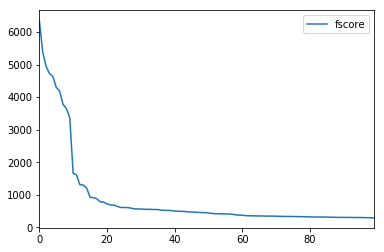

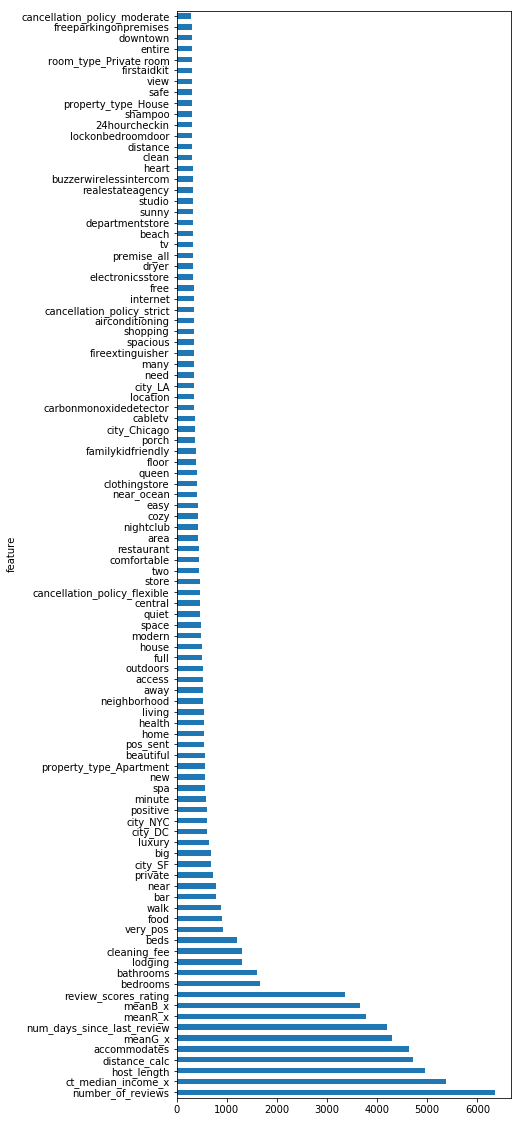

In [22]:
# plot top 100 features 
plt.figure()
df.head(100).plot()
df.head(100).plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 20))